In [1]:
# Cell 1
# installs only if needed (comment out if already installed)
# !pip install scikit-learn --quiet

from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# fetch the dataset from OpenML (returns as_frame=True -> pandas DataFrame)
boston = fetch_openml(name="boston", version=1, as_frame=True)

# make a Bunch-like dictionary so it looks like old load_boston()
boston_dict = {
    "data": boston.data.values,
    "target": boston.target.astype(float).values,
    "feature_names": np.array(boston.feature_names),
    "DESCR": "Boston house prices dataset (fetched from OpenML)"
}

# create a convenient dataframe
df = boston.frame
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
# Cell 2
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
df.describe().T


Shape: (506, 14)

Columns:
 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Missing values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000
B,506.0,356.674032,91.294864,0.32000,375.377500,391.44000,396.225000,396.9000


In [3]:
# Cell 3
X = df.drop("MEDV", axis=1)   # features
y = df["MEDV"].astype(float)  # target (house price in $1000s)

# check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (506, 13)
y shape: (506,)


In [4]:
# Cell 4
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (404, 13) Test: (102, 13)


In [5]:
# Cell 5
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Cell 6
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# coefficients
coefficients = pd.Series(lr.coef_, index=X.columns)
print("Intercept:", lr.intercept_)
print("\nCoefficients:\n", coefficients.sort_values())


Intercept: 22.796534653465343

Coefficients:
 LSTAT     -3.611658
DIS       -3.081908
PTRATIO   -2.037752
NOX       -2.022319
TAX       -1.767014
CRIM      -1.002135
AGE       -0.176048
INDUS      0.278065
ZN         0.696269
CHAS       0.718738
B          1.129568
RAD        2.251407
RM         3.145240
dtype: float64


In [7]:
# Cell 7
y_pred = lr.predict(X_test_scaled)


In [8]:
# Cell 8
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R2: {r2:.3f}")


MSE: 24.291
RMSE: 4.929
MAE: 3.189
R2: 0.669


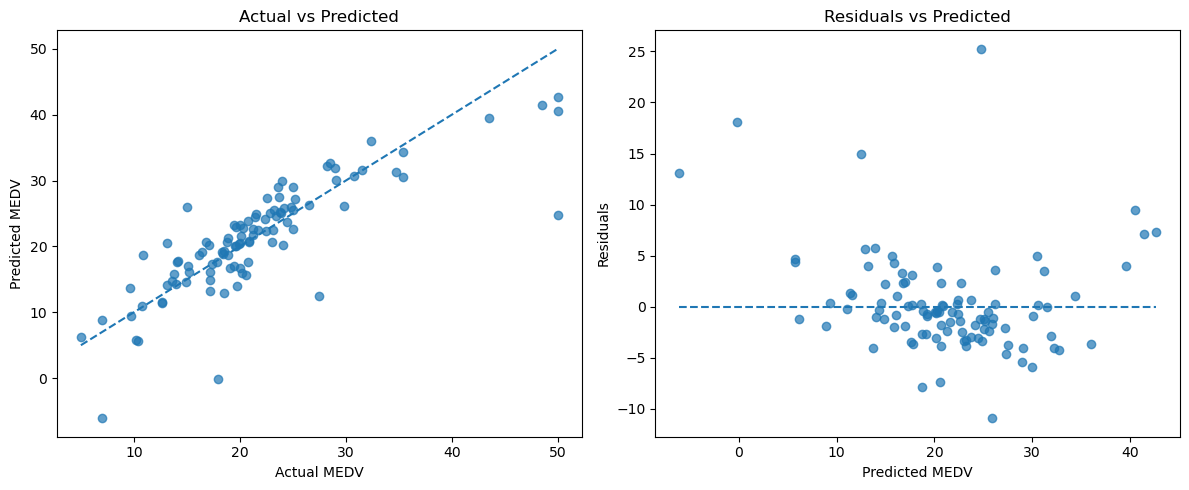

In [9]:
# Cell 9
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted")

plt.subplot(1,2,2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")

plt.tight_layout()
plt.show()


In [10]:
# Cell 10
coeff_sorted = coefficients.sort_values()
print("Top negative influence (decreases price):\n", coeff_sorted.head(5))
print("\nTop positive influence (increases price):\n", coeff_sorted.tail(5))


Top negative influence (decreases price):
 LSTAT     -3.611658
DIS       -3.081908
PTRATIO   -2.037752
NOX       -2.022319
TAX       -1.767014
dtype: float64

Top positive influence (increases price):
 ZN      0.696269
CHAS    0.718738
B       1.129568
RAD     2.251407
RM      3.145240
dtype: float64


In [11]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
print("Ridge R²:", ridge.score(X_test_scaled, y_test))

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
print("Lasso R²:", lasso.score(X_test_scaled, y_test))


Ridge R²: 0.6684624359643558
Lasso R²: 0.6681815922762606


In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Average R²:", scores.mean())


Cross-validation R² scores: [0.77501982 0.62424945 0.7594282  0.78766681 0.67581438]
Average R²: 0.7244357342240262


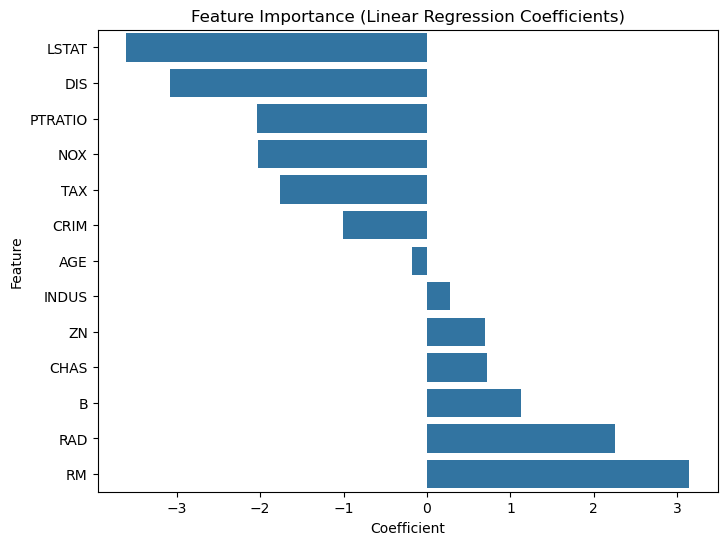

In [13]:
import seaborn as sns

coeff = pd.DataFrame({"Feature": X.columns, "Coefficient": lr.coef_})
coeff = coeff.sort_values(by="Coefficient")

plt.figure(figsize=(8,6))
sns.barplot(x="Coefficient", y="Feature", data=coeff)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print("Random Forest R²:", rf.score(X_test, y_test))


Random Forest R²: 0.8922527442109116
